# Tarefa

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<AxesSubplot:xlabel='sex', ylabel='body_mass_g'>

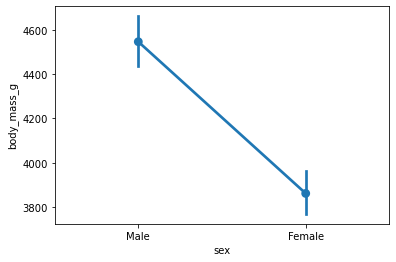

In [ ]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [7]:
from scipy import stats

# Separar o peso dos pinguins machos dos pinguins femeas
male_body_mass = pg[pg['sex'] == 'Male']['body_mass_g'].dropna()
female_body_mass = pg[pg['sex'] == 'Female']['body_mass_g'].dropna()

# Usar o teste-t em cada amostra
t_statistic, p_value = stats.ttest_ind(male_body_mass, female_body_mass)

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print(f"Com um p-value de {p_value:.3f} (que é menor que {alpha}), podemos rejeitar a hipótese nula. Há uma diferença estatisticamente significativa no peso corporal entre machos e fêmeas.")
else:
    print(f"Com um p-value de {p_value:.3f} (que é maior que {alpha}), não podemos rejeitar a hipótese nula. Não há evidência suficiente para afirmar uma diferença estatisticamente significativa no peso corporal entre machos e fêmeas.")

T-statistic: 8.54
P-value: 0.000
Com um p-value de 0.000 (que é menor que 0.05), podemos rejeitar a hipótese nula. Há uma diferença estatisticamente significativa no peso corporal entre machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

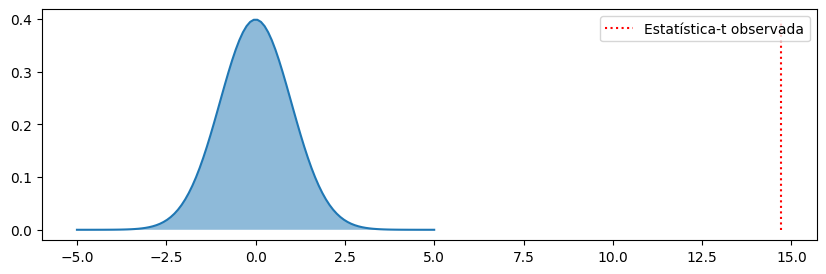

A estatística-t: (14.72) aponta que a diferença observada entre os grupos é enorme. Então podemos rejeitar a hipotese nula.


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

fig, ax = plt.subplots(figsize=(10,3))

mu = 0
variance = 1
sigma = variance**.5
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)

# Calculo dos graus de confiança
n_male = len(male_body_mass)
n_female = len(female_body_mass)
df = n_male + n_female - 2

y = st.t.pdf(x, df)
low = -np.inf
high = t_statistic

ax.plot(x, y)
ax.vlines(x=[t_statistic], # Usando a estatística-t
             ymin=0, ymax=y.max(),
             colors='r', linestyles='dotted', label='Estatística-t observada')

plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)

plt.grid(False)
plt.legend()
plt.show()

print(f"A estatística-t: ({t_statistic:.2f}) aponta que a diferença observada entre os grupos é enorme. Então podemos rejeitar a hipotese nula.")

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [32]:
unique_species = pg['species'].unique()
print(unique_species)

['Adelie' 'Chinstrap' 'Gentoo']


In [33]:
for species in unique_species:
    print(f"\n--- Teste para {species} ---")

    # Filtrar espécies de pinguim
    species_data = pg[pg['species'] == species]

    # Separate male and female body mass for the current species
    # Separar o peso corporal macho e femea por espécie
    male_body_mass_species = species_data[species_data['sex'] == 'Male']['body_mass_g'].dropna()
    female_body_mass_species = species_data[species_data['sex'] == 'Female']['body_mass_g'].dropna()

    # Verificando se existe data o suficiente para executar o teste-t
    if len(male_body_mass_species) > 1 and len(female_body_mass_species) > 1:
        # Realizando o teste
        t_statistic, p_value = stats.ttest_ind(male_body_mass_species, female_body_mass_species)

        print(f"T-statistic: {t_statistic:.2f}")
        print(f"P-value: {p_value:.3f}")

        if p_value < alpha:
            print(f"Com um p-value de {p_value:.3f} (que é menor que {alpha}), podemos rejeitar a hipótese nula para a espécie {species}. Há uma diferença estatisticamente significativa no peso corporal entre machos e fêmeas.")
        else:
            print(f"Com um p-value de {p_value:.3f} (que é maior que {alpha}), não podemos rejeitar a hipótese nula para a espécie {species}. Não há evidência suficiente para afirmar uma diferença estatisticamente significativa no peso corporal entre machos e fêmeas.")
    else:
        print(f"Não há dados suficientes para realizar o teste t para a espécie {species} (um ou ambos os grupos de sexo têm menos de 2 observações).")


--- Teste para Adelie ---
T-statistic: 13.13
P-value: 0.000
Com um p-value de 0.000 (que é menor que 0.05), podemos rejeitar a hipótese nula para a espécie Adelie. Há uma diferença estatisticamente significativa no peso corporal entre machos e fêmeas.

--- Teste para Chinstrap ---
T-statistic: 5.21
P-value: 0.000
Com um p-value de 0.000 (que é menor que 0.05), podemos rejeitar a hipótese nula para a espécie Chinstrap. Há uma diferença estatisticamente significativa no peso corporal entre machos e fêmeas.

--- Teste para Gentoo ---
T-statistic: 14.72
P-value: 0.000
Com um p-value de 0.000 (que é menor que 0.05), podemos rejeitar a hipótese nula para a espécie Gentoo. Há uma diferença estatisticamente significativa no peso corporal entre machos e fêmeas.
